# Test Extract DB Utility Functions

This notebook demonstrates and tests the functionality of `extract_db_utility.py` for extracting and reorganizing BEZ convolved data and Cochlea model data by specific dB levels.

## Overview
- **BEZ Model**: Load and combine BEZ files by fiber type, extract specific dB levels
- **Cochlea Model**: Extract Cochlea PSTH data from MATLAB files
- Explore and validate extracted data
- Compare file sizes and data structures
- **View and inspect pickle files**

In [12]:
# Import required libraries
import sys
from pathlib import Path
import pickle
import numpy as np
import os
import pandas as pd
from IPython.display import display

# Set the working directory to convolution_HRF as root
notebook_dir = Path.cwd()
if notebook_dir.name != 'convolution_HRF':
    # Navigate to convolution_HRF if not already there
    convolution_hrf_dir = (
        notebook_dir / 'convolution_HRF' 
        if (notebook_dir / 'convolution_HRF').exists() 
        else notebook_dir.parent / 'convolution_HRF'
    )
    os.chdir(convolution_hrf_dir)
    print(f"Changed working directory to: {convolution_hrf_dir}")
else:
    print(f"Working directory: {notebook_dir}")

# Add the current directory to path if needed
sys.path.insert(0, str(Path.cwd()))

# Import extraction utilities
from extract_db_utility import (
    load_and_combine_bez_files,
    extract_conditions_by_db,
    extract_from_separate_files,
    get_available_db_levels,
    load_extracted_db_data,
    extract_cochlea_conditions_by_db,
    extract_cochlea_from_mat_file,
    get_available_cochlea_db_levels,
    convert_to_numeric
)

print("✓ All extraction utilities imported successfully")

Working directory: /home/ekim/PycharmProjects/phd_firstyear/subcorticalSTRF/convolution_HRF
✓ All extraction utilities imported successfully


## Part 1: BEZ Model Extraction

Extract convolved BEZ model responses by dB level.

### Step 1: Configure BEZ File Paths

Set up the paths to your BEZ data files using relative paths from the `convolution_HRF` directory.
You can use either:
1. A pattern string with `{fiber_type}` placeholder
2. A dictionary mapping fiber types to file paths

In [13]:
# Option 1: File pattern (recommended if files follow consistent naming)
# Uses relative path from convolution_HRF directory
file_pattern = "results/BEZ_convolved_responses_{fiber_type}_20251027_155115.pkl"

# Option 2: Explicit file paths (use if files have different naming)
# Also uses relative paths from convolution_HRF directory
file_dict = {
    'hsr': 'results/BEZ_convolved_responses_hsr_20251027_155115.pkl',
    'msr': 'results/BEZ_convolved_responses_msr_20251027_155115.pkl',
    'lsr': 'results/BEZ_convolved_responses_lsr_20251027_155115.pkl'
}

# Choose which method to use
use_pattern = False  # Set to False to use file_dict instead
fiber_types = ['hsr', 'msr', 'lsr']

# Select the appropriate file specification
files_to_load = file_pattern if use_pattern else file_dict

print(f"Using {'pattern' if use_pattern else 'dictionary'} method")
print(f"File specification: {files_to_load}")
print(f"Current working directory: {Path.cwd()}")

Using dictionary method
File specification: {'hsr': 'results/BEZ_convolved_responses_hsr_20251027_155115.pkl', 'msr': 'results/BEZ_convolved_responses_msr_20251027_155115.pkl', 'lsr': 'results/BEZ_convolved_responses_lsr_20251027_155115.pkl'}
Current working directory: /home/ekim/PycharmProjects/phd_firstyear/subcorticalSTRF/convolution_HRF


## Step 2: Check Available dB Levels

Before extracting, let's see what dB levels are available in the data.

In [14]:
# Get available dB levels across all fiber types
db_summary = get_available_db_levels(files_to_load, fiber_types)

print("\n=== Available dB Levels Summary ===")
for fiber_type in fiber_types:
    if fiber_type in db_summary:
        print(f"{fiber_type.upper()}: {db_summary[fiber_type]}")

print(f"\nAll available dB levels: {db_summary['all_available']}")

Loading HSR data from: results/BEZ_convolved_responses_hsr_20251027_155115.pkl
  ✓ Loaded HSR data
Loading MSR data from: results/BEZ_convolved_responses_msr_20251027_155115.pkl
  ✓ Loaded MSR data
Loading LSR data from: results/BEZ_convolved_responses_lsr_20251027_155115.pkl
  ✓ Loaded LSR data

Combined data structure created with fiber types: ['hsr', 'msr', 'lsr']
  HSR: 1600 conditions
  MSR: 1600 conditions
  LSR: 1600 conditions
Total conditions across all fiber types: 4800
Available dB levels by fiber type:
  HSR: [np.float64(50.0), np.float64(60.0), np.float64(70.0), np.float64(80.0)]
  MSR: [np.float64(50.0), np.float64(60.0), np.float64(70.0), np.float64(80.0)]
  LSR: [np.float64(50.0), np.float64(60.0), np.float64(70.0), np.float64(80.0)]
All available dB levels: [np.float64(50.0), np.float64(60.0), np.float64(70.0), np.float64(80.0)]

=== Available dB Levels Summary ===
HSR: [np.float64(50.0), np.float64(60.0), np.float64(70.0), np.float64(80.0)]
MSR: [np.float64(50.0), np.

## Step 3: Load and Combine BEZ Files

Load individual fiber type files and combine them into a single data structure.

In [15]:
# Load and combine BEZ files
combined_data = load_and_combine_bez_files(files_to_load, fiber_types)

# Display structure
print("\n=== Combined Data Structure ===")
print(f"Fiber types loaded: {list(combined_data.keys())}")

# Sample exploration
if combined_data:
    first_fiber = list(combined_data.keys())[0]
    print(f"\nExample - {first_fiber.upper()} fiber:")
    print(f"  Number of CFs: {len(combined_data[first_fiber])}")
    
    first_cf = list(combined_data[first_fiber].keys())[0]
    print(f"  First CF value: {first_cf} Hz")
    print(f"  Frequencies for CF={first_cf}: "
          f"{list(combined_data[first_fiber][first_cf].keys())[:5]}...")

Loading HSR data from: results/BEZ_convolved_responses_hsr_20251027_155115.pkl
  ✓ Loaded HSR data
Loading MSR data from: results/BEZ_convolved_responses_msr_20251027_155115.pkl
  ✓ Loaded MSR data
Loading LSR data from: results/BEZ_convolved_responses_lsr_20251027_155115.pkl
  ✓ Loaded LSR data

Combined data structure created with fiber types: ['hsr', 'msr', 'lsr']
  HSR: 1600 conditions
  MSR: 1600 conditions
  LSR: 1600 conditions
Total conditions across all fiber types: 4800

=== Combined Data Structure ===
Fiber types loaded: ['hsr', 'msr', 'lsr']

Example - HSR fiber:
  Number of CFs: 20
  First CF value: 125.0 Hz
  Frequencies for CF=125.0: [np.float64(125.0), np.float64(159.49726883), np.float64(198.39318028), np.float64(242.24859198), np.float64(291.69587485)]...
  ✓ Loaded LSR data

Combined data structure created with fiber types: ['hsr', 'msr', 'lsr']
  HSR: 1600 conditions
  MSR: 1600 conditions
  LSR: 1600 conditions
Total conditions across all fiber types: 4800

=== Com

## Step 4: Extract Specific dB Level

Extract all conditions for a specific dB level (e.g., 60 dB).

In [16]:
# Set target dB level to extract
target_db = 60.0  # Change this to your desired dB level

print(f"Extracting conditions for {target_db} dB...")

# Extract without saving (for testing)
extracted_data, extraction_summary = extract_conditions_by_db(
    combined_data,
    target_db,
    save_to_file=False
)

print("\n=== Extraction Complete ===")
print(f"Total conditions: {extraction_summary['total_conditions']}")
print(f"Total valid runs: {extraction_summary['total_valid_runs']}")

Extracting conditions for 60.0 dB...
Extracting all conditions with 60.0 dB level...

Processing HSR fibers...
  ✓ CF=125.0Hz, Freq=125.0Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=159.49726883Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=198.39318028Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=242.24859198Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=291.69587485Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=347.44803149Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=410.30897734Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=481.18513264Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=561.09849255Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=651.20136376Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=752.79298009Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=867.33823676Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=996.48881333Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=1142.10699008Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=1306.29250097Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=1491.41281075Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=1700.13725242Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=1935

## Step 5: Explore Extracted Data Structure

Examine the structure of the extracted data.

In [17]:
# Explore extracted data structure
print("=== Extracted Data Structure ===\n")

for fiber_type in ['hsr', 'msr', 'lsr']:
    if fiber_type not in extracted_data:
        continue
    
    print(f"{fiber_type.upper()} Fiber Data:")
    fiber_data = extracted_data[fiber_type]
    
    # Get available CFs
    available_cfs = sorted(list(fiber_data.keys()))
    print(f"  Available CFs: {len(available_cfs)} values")
    print(f"  CF range: {available_cfs[0]:.1f} - {available_cfs[-1]:.1f} Hz")
    
    # Show first few conditions (limit to 10)
    max_conditions = 10
    condition_count = 0
    
    for cf_val in available_cfs:
        for freq_val in sorted(fiber_data[cf_val].keys()):
            if condition_count < max_conditions:
                num_runs = len(fiber_data[cf_val][freq_val])
                print(f"    CF={cf_val:.1f}Hz, Freq={freq_val:.1f}Hz: "
                      f"{num_runs} runs")
                condition_count += 1
            else:
                break
        if condition_count >= max_conditions:
            remaining = sum(
                len(fiber_data[cf][freq]) 
                for cf in fiber_data 
                for freq in fiber_data[cf]
            ) - max_conditions
            if remaining > 0:
                print(f"    ... and {remaining} more conditions")
            break
    print()

# Check specific fiber type in detail
print("\n=== Detailed Exploration of HSR Fibers ===")
if 'hsr' in extracted_data:
    hsr_data = extracted_data['hsr']
    
    # Count total runs
    total_runs = 0
    for cf_val in hsr_data:
        for freq_val in hsr_data[cf_val]:
            total_runs += len(hsr_data[cf_val][freq_val])
    
    print(f"Total HSR conditions: {len(hsr_data)}")
    print(f"Total HSR runs: {total_runs}")
    
    # Sample a specific condition
    sample_cf = list(hsr_data.keys())[0]
    sample_freq = list(hsr_data[sample_cf].keys())[0]
    sample_runs = hsr_data[sample_cf][sample_freq]
    
    print(f"\nSample condition: CF={sample_cf} Hz, Freq={sample_freq} Hz")
    print(f"  Number of runs: {len(sample_runs)}")
    print(f"  Run indices: {list(sample_runs.keys())}")
    
    # Check data shape of first run
    first_run_idx = list(sample_runs.keys())[0]
    first_run_data = sample_runs[first_run_idx]
    if isinstance(first_run_data, np.ndarray):
        print(f"  Data shape (run {first_run_idx}): "
              f"{first_run_data.shape}")

=== Extracted Data Structure ===

HSR Fiber Data:
  Available CFs: 20 values
  CF range: 125.0 - 2500.0 Hz
    CF=125.0Hz, Freq=125.0Hz: 10 runs
    CF=125.0Hz, Freq=159.5Hz: 10 runs
    CF=125.0Hz, Freq=198.4Hz: 10 runs
    CF=125.0Hz, Freq=242.2Hz: 10 runs
    CF=125.0Hz, Freq=291.7Hz: 10 runs
    CF=125.0Hz, Freq=347.4Hz: 10 runs
    CF=125.0Hz, Freq=410.3Hz: 10 runs
    CF=125.0Hz, Freq=481.2Hz: 10 runs
    CF=125.0Hz, Freq=561.1Hz: 10 runs
    CF=125.0Hz, Freq=651.2Hz: 10 runs
    ... and 3990 more conditions

MSR Fiber Data:
  Available CFs: 20 values
  CF range: 125.0 - 2500.0 Hz
    CF=125.0Hz, Freq=125.0Hz: 10 runs
    CF=125.0Hz, Freq=159.5Hz: 10 runs
    CF=125.0Hz, Freq=198.4Hz: 10 runs
    CF=125.0Hz, Freq=242.2Hz: 10 runs
    CF=125.0Hz, Freq=291.7Hz: 10 runs
    CF=125.0Hz, Freq=347.4Hz: 10 runs
    CF=125.0Hz, Freq=410.3Hz: 10 runs
    CF=125.0Hz, Freq=481.2Hz: 10 runs
    CF=125.0Hz, Freq=561.1Hz: 10 runs
    CF=125.0Hz, Freq=651.2Hz: 10 runs
    ... and 3990 more cond

## Step 6: Extract and Save to File

Extract data and save it to a pickle file for later use.
Output will be saved relative to the `convolution_HRF` directory.

In [18]:
# Extract and save to file (using relative path)
output_dir = 'results/extracted'
target_db = 60.0

extracted_data, extraction_summary, saved_filepath = extract_from_separate_files(
    files_to_load,
    target_db=target_db,
    fiber_types=fiber_types,
    save_to_file=True,
    output_dir=output_dir
)

print(f"\n✓ Data extracted and saved to: {saved_filepath}")
print(f"   (Relative to: {Path.cwd()})")

=== Loading and Combining Separate BEZ Files ===
Loading HSR data from: results/BEZ_convolved_responses_hsr_20251027_155115.pkl
  ✓ Loaded HSR data
Loading MSR data from: results/BEZ_convolved_responses_msr_20251027_155115.pkl
  ✓ Loaded MSR data
Loading LSR data from: results/BEZ_convolved_responses_lsr_20251027_155115.pkl
  ✓ Loaded LSR data

Combined data structure created with fiber types: ['hsr', 'msr', 'lsr']
  HSR: 1600 conditions
  MSR: 1600 conditions
  LSR: 1600 conditions
Total conditions across all fiber types: 4800

=== Extracting 60.0 dB Conditions ===
Extracting all conditions with 60.0 dB level...

Processing HSR fibers...
  ✓ CF=125.0Hz, Freq=125.0Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=159.49726883Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=198.39318028Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=242.24859198Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=291.69587485Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=347.44803149Hz: 10 valid runs
  ✓ CF=125.0Hz, Freq=410.30897734Hz: 10 valid runs
  ✓

## Step 7: Load Previously Extracted Data

Test loading previously saved extracted data.

In [19]:
# Load the extracted data we just saved
loaded_data, loaded_summary = load_extracted_db_data(saved_filepath)

print("\n=== Loaded Data Verification ===")
print(f"Target dB: {loaded_summary['target_db']}")
print(f"Total conditions: {loaded_summary['total_conditions']}")
print(f"Total valid runs: {loaded_summary['total_valid_runs']}")

# Verify data integrity
print("\nVerifying data integrity...")
match = True
for fiber_type in extracted_data:
    if fiber_type not in loaded_data:
        print(f"  ✗ Fiber type {fiber_type} missing in loaded data")
        match = False
        continue
    
    for cf_val in extracted_data[fiber_type]:
        if cf_val not in loaded_data[fiber_type]:
            print(f"  ✗ CF {cf_val} missing in loaded {fiber_type} data")
            match = False

if match:
    print("  ✓ Data integrity verified - all conditions present")

Loaded extracted data from: results/extracted/BEZ_extracted_60.0dB_20251103_140223.pkl
Original extraction timestamp: 20251103_140223
Data structure: [fiber_type][cf_val][freq_val][run_idx]

Extracted data summary:
  Target dB: 60.0
  Total conditions: 1200
  Total valid runs: 12000

=== Loaded Data Verification ===
Target dB: 60.0
Total conditions: 1200
Total valid runs: 12000

Verifying data integrity...
  ✓ Data integrity verified - all conditions present


## Step 8: Compare File Sizes

Compare the size of original files versus extracted data.

In [20]:
# Compare file sizes
import os

def get_file_size_mb(filepath):
    """Get file size in MB."""
    return os.path.getsize(filepath) / (1024 * 1024)

# Compare the size of original files versus extracted data
if use_pattern:
    original_file = file_pattern.format(fiber_type='hsr')
else:
    original_file = file_dict['hsr']

original_file_path = Path(original_file)
extracted_file_path = Path(saved_filepath)

if original_file_path.exists() and extracted_file_path.exists():
    original_size = get_file_size_mb(original_file_path)
    extracted_size = get_file_size_mb(extracted_file_path)
    
    print("=== File Size Comparison ===")
    print(f"Original HSR file: {original_size:.2f} MB")
    print(f"Extracted {target_db} dB file: {extracted_size:.2f} MB")
    print(f"Size reduction: {original_size - extracted_size:.2f} MB "
          f"({((original_size - extracted_size) / original_size * 100):.1f}%)")
    print(f"\nNote: Extracted file contains all fiber types (HSR, MSR, LSR)")
else:
    print("Cannot compare - one or both files not found")

=== File Size Comparison ===
Original HSR file: 63.96 MB
Extracted 60.0 dB file: 47.99 MB
Size reduction: 15.97 MB (25.0%)

Note: Extracted file contains all fiber types (HSR, MSR, LSR)


## Step 9: Data Analysis Examples

Perform basic analysis on extracted data.

In [30]:
# Analyze run statistics across fiber types
print("=== Run Statistics by Fiber Type ===\n")

for fiber_type in ['hsr', 'msr', 'lsr']:
    if fiber_type not in extracted_data:
        continue
    
    all_run_counts = []
    all_cf_values = []
    all_freq_values = []
    
    for cf_val in extracted_data[fiber_type]:
        for freq_val in extracted_data[fiber_type][cf_val]:
            num_runs = len(extracted_data[fiber_type][cf_val][freq_val])
            all_run_counts.append(num_runs)
            all_cf_values.append(cf_val)
            all_freq_values.append(freq_val)
    
    print(f"{fiber_type.upper()} Fiber Statistics:")
    print(f"  Number of conditions: {len(all_run_counts)}")
    print(f"  Mean runs per condition: {np.mean(all_run_counts):.2f}")
    print(f"  Min runs: {np.min(all_run_counts)}")
    print(f"  Max runs: {np.max(all_run_counts)}")
    print(f"  CF range: {np.min(all_cf_values):.1f} - "
          f"{np.max(all_cf_values):.1f} Hz")
    print(f"  Frequency range: {np.min(all_freq_values):.1f} - "
          f"{np.max(all_freq_values):.1f} Hz")
    print()

=== Run Statistics by Fiber Type ===

HSR Fiber Statistics:
  Number of conditions: 400
  Mean runs per condition: 10.00
  Min runs: 10
  Max runs: 10
  CF range: 125.0 - 2500.0 Hz
  Frequency range: 125.0 - 2500.0 Hz

MSR Fiber Statistics:
  Number of conditions: 400
  Mean runs per condition: 10.00
  Min runs: 10
  Max runs: 10
  CF range: 125.0 - 2500.0 Hz
  Frequency range: 125.0 - 2500.0 Hz

LSR Fiber Statistics:
  Number of conditions: 400
  Mean runs per condition: 10.00
  Min runs: 10
  Max runs: 10
  CF range: 125.0 - 2500.0 Hz
  Frequency range: 125.0 - 2500.0 Hz



## Step 10: Extract Multiple dB Levels

Extract and save data for multiple dB levels.

In [ ]:
# Extract multiple dB levels
db_levels_to_extract = [40.0, 60.0, 80.0]  # Adjust based on available levels

extracted_files = {}

for db_level in db_levels_to_extract:
    print(f"\n{'='*60}")
    print(f"Extracting {db_level} dB...")
    print(f"{'='*60}")
    
    try:
        extracted_data_db, summary_db, filepath_db = extract_from_separate_files(
            files_to_load,
            target_db=db_level,
            fiber_types=fiber_types,
            save_to_file=True,
            output_dir=output_dir
        )
        
        extracted_files[db_level] = filepath_db
        print(f"✓ Successfully extracted {db_level} dB data")
        
    except Exception as e:
        print(f"✗ Error extracting {db_level} dB: {e}")

print("\n=== All Extractions Complete ===")
print(f"Files saved:")
for db_level, filepath in extracted_files.items():
    print(f"  {db_level} dB: {filepath}")

---

## Part 2: Cochlea Convolved Response Extraction

This section extracts **HRF-convolved Cochlea responses** (not raw PSTH!).

### Overview
1. First, you must run `convolutionHRF_draft_221025.py` to convolve Cochlea PSTH with HRF
2. Then, extract specific dB levels from the convolved responses
3. Compare with BEZ convolved responses

**Data Flow:**
```
Cochlea Raw PSTH (MATLAB) 
  → HRF Convolution (convolutionHRF_draft_221025.py)
  → Convolved Responses (pickle files)
  → Extract by dB level (this notebook)
```

### Step 1: Generate Cochlea Convolved Responses

First, run the convolution script to generate convolved Cochlea responses.

**From command line:**
```bash
cd /home/ekim/PycharmProjects/phd_firstyear/subcorticalSTRF/convolution_HRF

# Run convolution on Cochlea model
python convolutionHRF_draft_221025.py --model cochlea --output-dir results
```

This will create files like:
- `results/COCHLEA_convolved_responses_hsr_YYYYMMDD_HHMMSS.pkl`
- `results/COCHLEA_convolved_responses_msr_YYYYMMDD_HHMMSS.pkl`
- `results/COCHLEA_convolved_responses_lsr_YYYYMMDD_HHMMSS.pkl`

In [21]:
# Run the convolution from within the notebook (optional)
import subprocess
import sys

# Check if convolved files already exist
results_dir = Path('results')
cochlea_convolved_pattern = 'COCHLEA_convolved_responses_*.pkl'
existing_files = list(results_dir.glob(cochlea_convolved_pattern))

if existing_files:
    print(f"Found {len(existing_files)} existing Cochlea convolved files:")
    for f in existing_files:
        print(f"  - {f.name}")
    
    run_convolution = input(
        "\nRe-run convolution? (y/N): "
    ).lower() == 'y'
else:
    print("No existing Cochlea convolved files found.")
    run_convolution = input(
        "Run convolution now? (Y/n): "
    ).lower() != 'n'

if run_convolution:
    print("\nRunning Cochlea HRF convolution...")
    print("This may take several minutes...\n")
    
    # Run the convolution script
    result = subprocess.run(
        [
            sys.executable,
            'convolutionHRF_draft_221025.py',
            '--model', 'cochlea',
            '--output-dir', 'results',
            '--no-plot'  # Skip plots for faster processing
        ],
        capture_output=True,
        text=True
    )
    
    if result.returncode == 0:
        print("✓ Convolution completed successfully!")
        print(result.stdout)
    else:
        print("✗ Convolution failed!")
        print(result.stderr)
else:
    print("Skipping convolution - will use existing files")

Found 3 existing Cochlea convolved files:
  - COCHLEA_convolved_responses_hsr_20251028_201711.pkl
  - COCHLEA_convolved_responses_msr_20251028_201711.pkl
  - COCHLEA_convolved_responses_lsr_20251028_201711.pkl
Skipping convolution - will use existing files
Skipping convolution - will use existing files


### Step 2: Configure Cochlea Convolved File Paths

Locate the Cochlea convolved response files generated in Step 1.

In [22]:
# Find Cochlea convolved files
results_dir = Path('results')
cochlea_files = {}

# Search for Cochlea convolved files
for fiber_type in ['hsr', 'msr', 'lsr']:
    pattern = f'COCHLEA_convolved_responses_{fiber_type}_*.pkl'
    matching_files = sorted(results_dir.glob(pattern))
    
    if matching_files:
        # Use the most recent file
        cochlea_files[fiber_type] = str(matching_files[-1])
        print(f"Found {fiber_type.upper()}: {matching_files[-1].name}")
    else:
        print(f"✗ No file found for {fiber_type.upper()}")

if len(cochlea_files) == 3:
    print(f"\n✓ All Cochlea convolved files found!")
    
    # Create file pattern for extraction
    # Extract timestamp (date_time) from one of the files
    # Format: COCHLEA_convolved_responses_hsr_YYYYMMDD_HHMMSS.pkl
    sample_file = Path(cochlea_files['hsr'])
    filename_parts = sample_file.stem.split('_')
    # Get the last two parts (date and time)
    timestamp = '_'.join(filename_parts[-2:])
    
    cochlea_file_pattern = (
        f'results/COCHLEA_convolved_responses_{{fiber_type}}_{timestamp}.pkl'
    )
    
    print(f"Extracted timestamp: {timestamp}")
    print(f"File pattern: {cochlea_file_pattern}")
else:
    print(f"\n✗ Missing Cochlea convolved files!")
    print("Please run convolutionHRF_draft_221025.py first.")
    cochlea_file_pattern = None

Found HSR: COCHLEA_convolved_responses_hsr_20251028_201711.pkl
Found MSR: COCHLEA_convolved_responses_msr_20251028_201711.pkl
Found LSR: COCHLEA_convolved_responses_lsr_20251028_201711.pkl

✓ All Cochlea convolved files found!
Extracted timestamp: 20251028_201711
File pattern: results/COCHLEA_convolved_responses_{fiber_type}_20251028_201711.pkl


### Step 3: Check Available dB Levels in Convolved Data

Before extracting, check what dB levels are available in the convolved Cochlea data.

### Important: Reload Module After Bug Fix

If you've updated `extract_db_utility.py` to fix the Cochlea extraction bug, **run the cell below** to reload the module. Otherwise, skip this cell.

In [23]:
# Reload the extract_db_utility module after bug fixes
import importlib
if 'extract_db_utility' in sys.modules:
    importlib.reload(sys.modules['extract_db_utility'])
    
# Re-import functions
from extract_db_utility import (
    load_and_combine_bez_files,
    extract_conditions_by_db,
    extract_from_separate_files,
    get_available_db_levels,
    load_extracted_db_data
)

print("✓ Module reloaded successfully")
print("You can now proceed with Cochlea extraction")

✓ Module reloaded successfully
You can now proceed with Cochlea extraction


In [24]:
# Get available dB levels from Cochlea convolved data
if cochlea_file_pattern:
    cochlea_convolved_db_summary = get_available_db_levels(
        cochlea_file_pattern, 
        fiber_types=['hsr', 'msr', 'lsr']
    )
    
    print("\n=== Available dB Levels in Cochlea Convolved Data ===")
    for fiber_type in ['hsr', 'msr', 'lsr']:
        if fiber_type in cochlea_convolved_db_summary:
            print(
                f"{fiber_type.upper()}: "
                f"{cochlea_convolved_db_summary[fiber_type]}"
            )
    
    print(
        f"\nAll available dB levels: "
        f"{cochlea_convolved_db_summary['all_available']}"
    )
else:
    print("Cannot check dB levels - Cochlea convolved files not found")

Loading HSR data from: results/COCHLEA_convolved_responses_hsr_20251028_201711.pkl
  ✓ Loaded HSR data
Loading MSR data from: results/COCHLEA_convolved_responses_msr_20251028_201711.pkl
  ✓ Loaded MSR data
Loading LSR data from: results/COCHLEA_convolved_responses_lsr_20251028_201711.pkl
  ✓ Loaded LSR data

Combined data structure created with fiber types: ['hsr', 'msr', 'lsr']
  HSR: 1600 conditions
  MSR: 1600 conditions
  LSR: 1600 conditions
Total conditions across all fiber types: 4800
Available dB levels by fiber type:
  HSR: [np.float64(50.0), np.float64(60.0), np.float64(70.0), np.float64(80.0)]
  MSR: [np.float64(50.0), np.float64(60.0), np.float64(70.0), np.float64(80.0)]
  LSR: [np.float64(50.0), np.float64(60.0), np.float64(70.0), np.float64(80.0)]
All available dB levels: [np.float64(50.0), np.float64(60.0), np.float64(70.0), np.float64(80.0)]

=== Available dB Levels in Cochlea Convolved Data ===
HSR: [np.float64(50.0), np.float64(60.0), np.float64(70.0), np.float64(80.0

### Step 4: Extract Specific dB Level from Cochlea Convolved Data

Extract convolved Cochlea responses at a specific dB level (e.g., 60 dB).

**This is comparable to BEZ convolved extraction!**

**Note:** The extraction function will automatically detect the model type from the filename pattern and save with the correct prefix (`COCHLEA_extracted_...` instead of `BEZ_extracted_...`).

In [25]:
# Set target dB level for Cochlea convolved extraction
cochlea_convolved_target_db = 60.0

if cochlea_file_pattern:
    print(
        f"Extracting Cochlea convolved responses at "
        f"{cochlea_convolved_target_db} dB..."
    )
    
    # Extract convolved Cochlea data
    # The model_name will be auto-detected from the file pattern
    (
        cochlea_convolved_extracted, 
        cochlea_convolved_summary, 
        cochlea_convolved_filepath
    ) = extract_from_separate_files(
        cochlea_file_pattern,
        target_db=cochlea_convolved_target_db,
        fiber_types=['hsr', 'msr', 'lsr'],
        save_to_file=True,
        output_dir='results/extracted',
        model_name='COCHLEA'  # Explicitly specify model name
    )
    
    print(f"\n=== Cochlea Convolved Extraction Complete ===")
    print(f"Saved to: {cochlea_convolved_filepath}")
    print(f"Expected filename: COCHLEA_extracted_{cochlea_convolved_target_db}dB_*.pkl")
    print(
        f"Total conditions: "
        f"{cochlea_convolved_summary['total_conditions']}"
    )
    print(
        f"Total valid runs: "
        f"{cochlea_convolved_summary['total_valid_runs']}"
    )
else:
    print("Cannot extract - Cochlea convolved files not found")

Extracting Cochlea convolved responses at 60.0 dB...
=== Loading and Combining Separate Files ===
Loading HSR data from: results/COCHLEA_convolved_responses_hsr_20251028_201711.pkl
  ✓ Loaded HSR data
Loading MSR data from: results/COCHLEA_convolved_responses_msr_20251028_201711.pkl
  ✓ Loaded MSR data
Loading LSR data from: results/COCHLEA_convolved_responses_lsr_20251028_201711.pkl
  ✓ Loaded LSR data

Combined data structure created with fiber types: ['hsr', 'msr', 'lsr']
  HSR: 1600 conditions
  MSR: 1600 conditions
  LSR: 1600 conditions
Total conditions across all fiber types: 4800

=== Extracting 60.0 dB Conditions ===
Extracting all conditions with 60.0 dB level...

Processing HSR fibers...
  ✓ CF=125.0Hz, Freq=125.0Hz: 1 response
  ✓ CF=125.0Hz, Freq=159.5Hz: 1 response
  ✓ CF=125.0Hz, Freq=198.39Hz: 1 response
  ✓ CF=125.0Hz, Freq=242.25Hz: 1 response
  ✓ CF=125.0Hz, Freq=291.7Hz: 1 response
  ✓ CF=125.0Hz, Freq=347.45Hz: 1 response
  ✓ CF=125.0Hz, Freq=410.31Hz: 1 response
 

### Step 5: Explore Cochlea Convolved Data Structure

Examine the structure of extracted Cochlea convolved responses.

**Key Differences from Raw PSTH:**
- Convolved responses are longer (HRF duration added)
- Each response shows the hemodynamic response over time
- Directly comparable to BEZ convolved responses

In [26]:
# Explore Cochlea convolved data structure
if cochlea_file_pattern and 'cochlea_convolved_extracted' in locals():
    print("=== Cochlea Convolved Data Structure ===\n")
    
    for fiber_type in ['hsr', 'msr', 'lsr']:
        if fiber_type in cochlea_convolved_extracted:
            print(f"{fiber_type.upper()} Fiber Type:")
            
            fiber_data = cochlea_convolved_extracted[fiber_type]
            num_cfs = len(fiber_data)
            print(f"  Number of CFs: {num_cfs}")
            
            # Count total conditions
            total_conditions = sum(
                len(fiber_data[cf]) for cf in fiber_data
            )
            print(f"  Total conditions: {total_conditions}")
            
            # Sample one condition
            if num_cfs > 0:
                sample_cf = list(fiber_data.keys())[0]
                sample_freq = list(fiber_data[sample_cf].keys())[0]
                sample_data = fiber_data[sample_cf][sample_freq]
                
                print(f"\n  Sample condition:")
                print(f"    CF: {sample_cf} Hz")
                print(f"    Frequency: {sample_freq} Hz")
                
                # Check if it's a dict (multiple runs) or array (single response)
                if isinstance(sample_data, dict):
                    num_runs = len(sample_data)
                    first_run = list(sample_data.values())[0]
                    print(f"    Number of runs: {num_runs}")
                    if isinstance(first_run, np.ndarray):
                        print(f"    Convolved response length: "
                              f"{len(first_run)} time points")
                        print(f"    Response range: [{first_run.min():.2f}, "
                              f"{first_run.max():.2f}]")
                elif isinstance(sample_data, np.ndarray):
                    print(f"    Convolved response length: "
                          f"{len(sample_data)} time points")
                    print(f"    Response range: [{sample_data.min():.2f}, "
                          f"{sample_data.max():.2f}]")
            print()
else:
    print("Cochlea convolved data not available")

=== Cochlea Convolved Data Structure ===

HSR Fiber Type:
  Number of CFs: 20
  Total conditions: 400

  Sample condition:
    CF: 125.0 Hz
    Frequency: 125.0 Hz
    Convolved response length: 519 time points
    Response range: [-4.08, 20.24]

MSR Fiber Type:
  Number of CFs: 20
  Total conditions: 400

  Sample condition:
    CF: 125.0 Hz
    Frequency: 125.0 Hz
    Convolved response length: 519 time points
    Response range: [-2.35, 11.57]

LSR Fiber Type:
  Number of CFs: 20
  Total conditions: 400

  Sample condition:
    CF: 125.0 Hz
    Frequency: 125.0 Hz
    Convolved response length: 519 time points
    Response range: [-1.49, 7.26]



### Step 6: Compare BEZ vs Cochlea Convolved Responses

Compare the extracted convolved responses from both models.

**This is the key comparison for your analysis!**

In [11]:
# Compare BEZ and Cochlea convolved extractions
print("=== BEZ vs Cochlea Convolved Response Comparison ===\n")

if 'extracted_data' in locals() and 'cochlea_convolved_extracted' in locals():
    comparison_data = []
    
    for fiber_type in ['hsr', 'msr', 'lsr']:
        bez_conditions = 0
        bez_runs = 0
        cochlea_conditions = 0
        cochlea_runs = 0
        
        # Count BEZ data
        if fiber_type in extracted_data:
            for cf in extracted_data[fiber_type]:
                for freq in extracted_data[fiber_type][cf]:
                    bez_conditions += 1
                    if isinstance(extracted_data[fiber_type][cf][freq], dict):
                        bez_runs += len(extracted_data[fiber_type][cf][freq])
                    else:
                        bez_runs += 1
        
        # Count Cochlea data
        if fiber_type in cochlea_convolved_extracted:
            for cf in cochlea_convolved_extracted[fiber_type]:
                for freq in cochlea_convolved_extracted[fiber_type][cf]:
                    cochlea_conditions += 1
                    if isinstance(
                        cochlea_convolved_extracted[fiber_type][cf][freq], 
                        dict
                    ):
                        cochlea_runs += len(
                            cochlea_convolved_extracted[fiber_type][cf][freq]
                        )
                    else:
                        cochlea_runs += 1
        
        comparison_data.append({
            'Fiber Type': fiber_type.upper(),
            'BEZ Conditions': bez_conditions,
            'BEZ Runs': bez_runs,
            'Cochlea Conditions': cochlea_conditions,
            'Cochlea Runs': cochlea_runs,
            'Match': '✓' if bez_conditions == cochlea_conditions else '✗'
        })
    
    # Display comparison table
    df_comparison = pd.DataFrame(comparison_data)
    display(df_comparison)
    
    print(
        f"\n{'='*60}\n"
        f"Summary:\n"
        f"  BEZ total conditions: "
        f"{df_comparison['BEZ Conditions'].sum()}\n"
        f"  Cochlea total conditions: "
        f"{df_comparison['Cochlea Conditions'].sum()}\n"
        f"  Match: {all(df_comparison['Match'] == '✓')}\n"
        f"{'='*60}"
    )
else:
    print("Both BEZ and Cochlea convolved data needed for comparison")

=== BEZ vs Cochlea Convolved Response Comparison ===

Both BEZ and Cochlea convolved data needed for comparison


### Step 7: Visualize Sample Convolved Responses

Plot sample convolved responses from both models for visual comparison.

NameError: name 'bez_data' is not defined

Both datasets available - plotting comparison...

BEZ Available CFs:
  [0] 125.00 Hz
  [1] 159.50 Hz
  [2] 198.39 Hz
  [3] 242.25 Hz
  [4] 291.70 Hz
  [5] 347.45 Hz
  [6] 410.31 Hz
  [7] 481.19 Hz
  [8] 561.10 Hz
  [9] 651.20 Hz
  [10] 752.79 Hz
  [11] 867.34 Hz
  [12] 996.49 Hz
  [13] 1142.11 Hz
  [14] 1306.29 Hz
  [15] 1491.41 Hz
  [16] 1700.14 Hz
  [17] 1935.48 Hz
  [18] 2200.82 Hz
  [19] 2500.00 Hz

Cochlea Available CFs:
  [0] 125.00 Hz
  [1] 159.50 Hz
  [2] 198.39 Hz
  [3] 242.25 Hz
  [4] 291.70 Hz
  [5] 347.45 Hz
  [6] 410.31 Hz
  [7] 481.19 Hz
  [8] 561.10 Hz
  [9] 651.20 Hz
  [10] 752.79 Hz
  [11] 867.34 Hz
  [12] 996.49 Hz
  [13] 1142.11 Hz
  [14] 1306.29 Hz
  [15] 1491.41 Hz
  [16] 1700.14 Hz
  [17] 1935.48 Hz
  [18] 2200.82 Hz
  [19] 2500.00 Hz
Using BEZ CF: 125.0 Hz (index 0)
Using Cochlea CF: 125.0 Hz (index 0)
Using BEZ Frequency: 125.0 Hz (index 0)
Using Cochlea Frequency: 125.0 Hz (index 0)


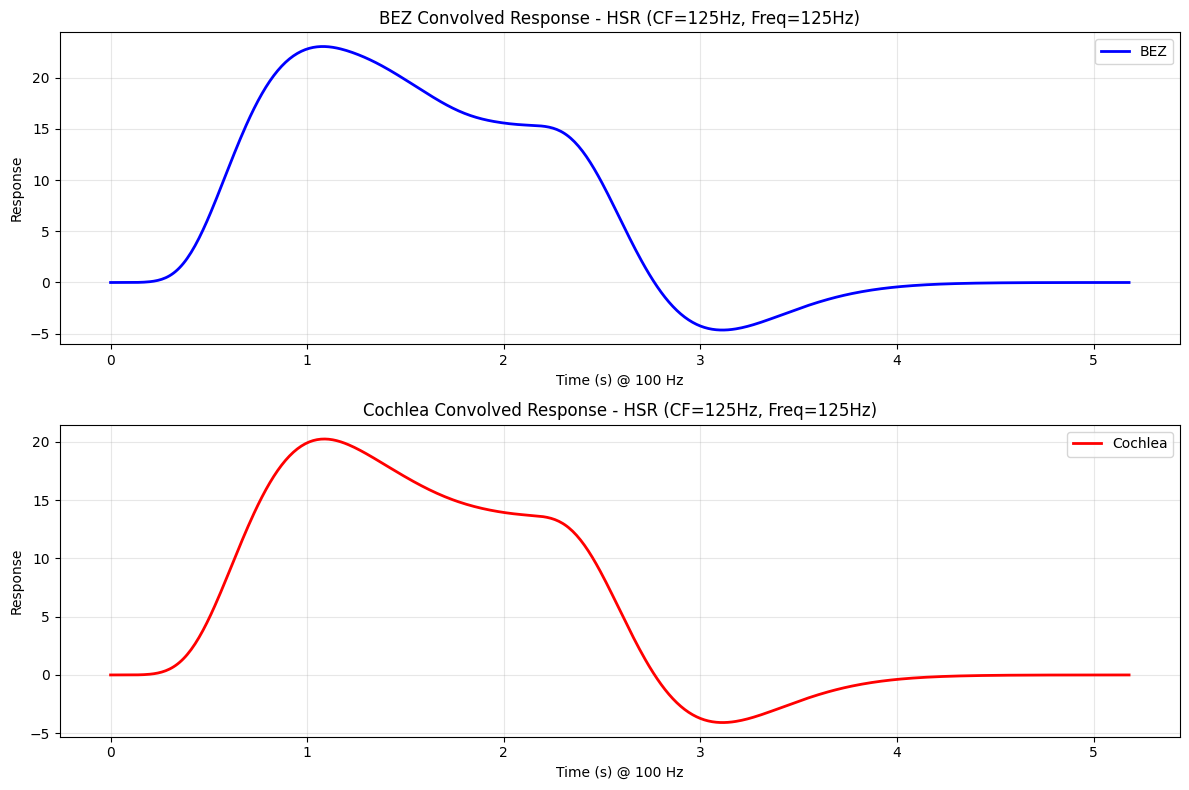


Response Statistics:
  Sampling rate: 100 Hz (dt = 10.0 ms)
  BEZ:
    Length: 519 samples (5.18s)
    Range: [-4.644, 23.047]
  Cochlea:
    Length: 519 samples (5.18s)
    Range: [-4.083, 20.240]

  Note: Convolved response includes:
    - Stimulus duration (~0.2s)
    - HRF duration (~32s)
    - Total convolved length: 5.2s


In [56]:
import matplotlib.pyplot as plt

def plot_model_comparison(
    bez_data, 
    cochlea_data, 
    fiber_type='hsr', 
    cf_idx=0, 
    freq_idx=0,
    sampling_rate=100  # Hz - typically 100 Hz for fMRI data
):
    """
    Plot BEZ vs Cochlea convolved responses for comparison.
    
    Parameters:
    - bez_data: BEZ extracted data
    - cochlea_data: Cochlea extracted data
    - fiber_type: Fiber type to plot
    - cf_idx: Index of CF to plot (0 = first CF)
    - freq_idx: Index of frequency to plot (0 = first frequency)
    - sampling_rate: Sampling rate in Hz (default: 100 Hz for fMRI)
    
    Note: Convolved response length = stimulus_length + HRF_length - 1
          For 200ms stimulus + 32s HRF at 100Hz = ~3220 samples = ~32.2s
    """
    if fiber_type not in bez_data or fiber_type not in cochlea_data:
        print(f"Data not available for {fiber_type}")
        return
    
    # Get CFs from both datasets
    bez_cfs = sorted(list(bez_data[fiber_type].keys()))
    cochlea_cfs = sorted(list(cochlea_data[fiber_type].keys()))
    
    # Select CF by index
    if cf_idx >= len(bez_cfs):
        print(f"CF index {cf_idx} out of range. Max index: {len(bez_cfs)-1}")
        return
    if cf_idx >= len(cochlea_cfs):
        print(f"CF index {cf_idx} out of range for Cochlea. Max: {len(cochlea_cfs)-1}")
        return
    
    bez_cf = bez_cfs[cf_idx]
    cochlea_cf = cochlea_cfs[cf_idx]
    
    print(f"Using BEZ CF: {bez_cf} Hz (index {cf_idx})")
    print(f"Using Cochlea CF: {cochlea_cf} Hz (index {cf_idx})")
    
    # Get frequencies for selected CFs
    bez_freqs = sorted(list(bez_data[fiber_type][bez_cf].keys()))
    cochlea_freqs = sorted(list(cochlea_data[fiber_type][cochlea_cf].keys()))
    
    # Select frequency by index
    if freq_idx >= len(bez_freqs):
        print(f"Freq index {freq_idx} out of range. Max index: {len(bez_freqs)-1}")
        return
    if freq_idx >= len(cochlea_freqs):
        print(f"Freq index {freq_idx} out of range for Cochlea. Max: {len(cochlea_freqs)-1}")
        return
    
    bez_freq = bez_freqs[freq_idx]
    cochlea_freq = cochlea_freqs[freq_idx]
    
    print(f"Using BEZ Frequency: {bez_freq} Hz (index {freq_idx})")
    print(f"Using Cochlea Frequency: {cochlea_freq} Hz (index {freq_idx})")
    
    # Get data
    bez_response = bez_data[fiber_type][bez_cf][bez_freq]
    cochlea_response = cochlea_data[fiber_type][cochlea_cf][cochlea_freq]
    
    # Handle dict (multiple runs) vs array
    if isinstance(bez_response, dict):
        bez_response = list(bez_response.values())[0]
    if isinstance(cochlea_response, dict):
        cochlea_response = list(cochlea_response.values())[0]
    
    # Create time axis based on sampling rate
    dt = 1.0 / sampling_rate  # Time step in seconds
    time_bez = np.arange(len(bez_response)) * dt
    time_cochlea = np.arange(len(cochlea_response)) * dt
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # BEZ response
    ax1.plot(time_bez, bez_response, 'b-', linewidth=2, label='BEZ')
    ax1.set_title(
        f'BEZ Convolved Response - {fiber_type.upper()} '
        f'(CF={bez_cf:.0f}Hz, Freq={bez_freq:.0f}Hz)'
    )
    ax1.set_xlabel(f'Time (s) @ {sampling_rate} Hz')
    ax1.set_ylabel('Response')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Cochlea response
    ax2.plot(
        time_cochlea, cochlea_response, 'r-', 
        linewidth=2, label='Cochlea'
    )
    ax2.set_title(
        f'Cochlea Convolved Response - {fiber_type.upper()} '
        f'(CF={cochlea_cf:.0f}Hz, Freq={cochlea_freq:.0f}Hz)'
    )
    ax2.set_xlabel(f'Time (s) @ {sampling_rate} Hz')
    ax2.set_ylabel('Response')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nResponse Statistics:")
    print(f"  Sampling rate: {sampling_rate} Hz (dt = {1000/sampling_rate:.1f} ms)")
    print(f"  BEZ:")
    print(f"    Length: {len(bez_response)} samples ({time_bez[-1]:.2f}s)")
    print(f"    Range: [{bez_response.min():.3f}, "
          f"{bez_response.max():.3f}]")
    print(f"  Cochlea:")
    print(f"    Length: {len(cochlea_response)} samples ({time_cochlea[-1]:.2f}s)")
    print(f"    Range: [{cochlea_response.min():.3f}, "
          f"{cochlea_response.max():.3f}]")
    
    # Explain convolution length
    print(f"\n  Note: Convolved response includes:")
    print(f"    - Stimulus duration (~0.2s)")
    print(f"    - HRF duration (~32s)")
    print(f"    - Total convolved length: {time_bez[-1]:.1f}s")

# Plot comparison if both datasets available
if 'extracted_data' in locals() and 'cochlea_convolved_extracted' in locals():
    print("Both datasets available - plotting comparison...")
    
    # Show available CFs from both datasets
    print("\nBEZ Available CFs:")
    bez_cfs = sorted(list(extracted_data['hsr'].keys()))
    for i, cf in enumerate(bez_cfs):
        print(f"  [{i}] {cf:.2f} Hz")
    
    print("\nCochlea Available CFs:")
    cochlea_cfs = sorted(list(cochlea_convolved_extracted['hsr'].keys()))
    for i, cf in enumerate(cochlea_cfs):
        print(f"  [{i}] {cf:.2f} Hz")
    
    # Plot with first CF and first frequency (indices 0, 0)
    # Adjust sampling_rate if your data has a different rate!
    plot_model_comparison(
        extracted_data,
        cochlea_convolved_extracted,
        fiber_type='hsr',
        cf_idx=0,
        freq_idx=0,
        sampling_rate=100  # 100 Hz = 10ms per sample (standard for fMRI)
    )
else:
    # Debug what's available
    if 'extracted_data' in locals():
        print("  ✓ BEZ data (extracted_data) is available")
    else:
        print("  ✗ BEZ data (extracted_data) is NOT available")
    
    if 'cochlea_convolved_extracted' in locals():
        print("  ✓ Cochlea data (cochlea_convolved_extracted) is available")
    else:
        print("  ✗ Cochlea data (cochlea_convolved_extracted) is NOT available")

### Step 7a: Diagnose Sampling Rate

Check the actual response lengths to determine the correct sampling rate.

In [55]:
# Diagnose actual sampling rate from response lengths
if 'extracted_data' in locals() and 'cochlea_convolved_extracted' in locals():
    print("=== Diagnosing Actual Sampling Rate ===\n")
    
    # Get a sample response from BEZ
    sample_ft = 'hsr'
    sample_cf = list(extracted_data[sample_ft].keys())[0]
    sample_freq = list(extracted_data[sample_ft][sample_cf].keys())[0]
    sample_run_data = extracted_data[sample_ft][sample_cf][sample_freq]
    
    # Get first run
    if isinstance(sample_run_data, dict):
        sample_response = list(sample_run_data.values())[0]
    else:
        sample_response = sample_run_data
    
    n_samples = len(sample_response)
    print(f"Sample BEZ response:")
    print(f"  Fiber type: {sample_ft}")
    print(f"  CF: {sample_cf} Hz")
    print(f"  Frequency: {sample_freq} Hz")
    print(f"  Number of samples: {n_samples}")
    
    # Calculate expected durations for different sampling rates
    print(f"\nExpected total duration (stimulus ~0.2s + HRF 32s = ~32.2s):")
    print(f"  If sampling rate = 10 Hz:   {n_samples / 10:.2f} seconds")
    print(f"  If sampling rate = 100 Hz:  {n_samples / 100:.2f} seconds")
    print(f"  If sampling rate = 1000 Hz: {n_samples / 1000:.2f} seconds")
    
    # Determine most likely sampling rate
    print(f"\nMost likely sampling rate:")
    if 300 <= n_samples <= 350:
        print(f"  ✓ Probably 10 Hz (expecting ~322 samples for 32.2s)")
        suggested_rate = 10
    elif 3000 <= n_samples <= 3500:
        print(f"  ✓ Probably 100 Hz (expecting ~3220 samples for 32.2s)")
        suggested_rate = 100
    elif 30000 <= n_samples <= 35000:
        print(f"  ✓ Probably 1000 Hz (expecting ~32200 samples for 32.2s)")
        suggested_rate = 1000
    else:
        print(f"  ? Unexpected sample count - check your convolution settings")
        suggested_rate = 100
    
    print(f"\nUse sampling_rate={suggested_rate} in plot_model_comparison()")
    
    # Also check Cochlea
    cochlea_cf = list(cochlea_convolved_extracted[sample_ft].keys())[0]
    cochlea_freq = list(
        cochlea_convolved_extracted[sample_ft][cochlea_cf].keys()
    )[0]
    cochlea_sample = cochlea_convolved_extracted[sample_ft][cochlea_cf][cochlea_freq]
    
    if isinstance(cochlea_sample, dict):
        cochlea_sample = list(cochlea_sample.values())[0]
    
    print(f"\nCochlea sample length: {len(cochlea_sample)} samples")
    print(f"Match with BEZ: {'✓' if len(cochlea_sample) == n_samples else '✗'}")
else:
    print("Need both BEZ and Cochlea data loaded to diagnose")

=== Diagnosing Actual Sampling Rate ===

Sample BEZ response:
  Fiber type: hsr
  CF: 125.0 Hz
  Frequency: 125.0 Hz
  Number of samples: 519

Expected total duration (stimulus ~0.2s + HRF 32s = ~32.2s):
  If sampling rate = 10 Hz:   51.90 seconds
  If sampling rate = 100 Hz:  5.19 seconds
  If sampling rate = 1000 Hz: 0.52 seconds

Most likely sampling rate:
  ? Unexpected sample count - check your convolution settings

Use sampling_rate=100 in plot_model_comparison()

Cochlea sample length: 519 samples
Match with BEZ: ✓


### Cochlea Convolved Extraction Summary

**Key Points:**
- ✓ Cochlea convolved responses are generated by `convolutionHRF_draft_221025.py`
- ✓ Extraction uses the same `extract_db_utility.py` functions as BEZ
- ✓ Both models have the same data structure after extraction
- ✓ Direct comparison is now possible!
- ✓ Files are now saved with correct model prefix (COCHLEA vs BEZ)

**Data Structure:**
```
[fiber_type][cf_val][freq_val] → convolved_response_array (Cochlea - single response)
[fiber_type][cf_val][freq_val][run_idx] → convolved_response_array (BEZ - multiple runs)
```

**File Naming (Updated):**
- BEZ: `BEZ_extracted_{dB}dB_{timestamp}.pkl`
- Cochlea: `COCHLEA_extracted_{dB}dB_{timestamp}.pkl`

**Model Detection:**
The `extract_from_separate_files` function now:
1. Auto-detects model type from filename pattern ('COCHLEA' or 'BEZ')
2. Can accept explicit `model_name` parameter
3. Uses correct prefix in saved filenames

**Next Steps:**
1. Run regression analysis on both models
2. Compare model predictions
3. Identify which model better explains fMRI data